# Week 8: RNA-seq clustering

In [1]:
import pandas as pd
import scipy 
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage, leaves_list
from matplotlib import pyplot as plt
from scipy import stats
import statsmodels.formula.api as smf
import seaborn as sns
import statsmodels.api as sm

In [2]:
# Read in file and transform for clustering: 
filename = '/Users/cmdb/qbb2020-answers/week8-hw/all_annotated.csv'
rna_seq = pd.read_csv(filename, sep = ',')
# median gene expression > 0
rna_seq['median'] = rna_seq.iloc[:, 2:].median(axis = 1)
rna_seq_nonzero = rna_seq[rna_seq['median'] != 0]
# transform with log2(FPKM + 0.1)
rna_1 = rna_seq_nonzero.iloc[:,2:18] + 0.1
rna_seq_log2 = np.log2(rna_1)
rna_seq_transform = rna_seq_nonzero.iloc[:, :2].merge(rna_seq_log2, how='outer', left_index=True, right_index=True)
# reset index 
rna_seq_transform.reset_index(inplace=True)
rna_seq_transform

,index,t_name,gene_name,male_10,male_11,male_12,male_13,male_14A,male_14B,male_14C,male_14D,female_10,female_11,female_12,female_13,female_14A,female_14B,female_14C,female_14D
0,3,FBtr0302347,CR40182,4.573651,3.593093,4.383186,3.772605,4.240476,4.749679,4.518529,3.558602,4.459054,3.809626,4.051558,3.669331,4.995485,4.522507,3.851021,4.112914
1,8,FBtr0113885,Parp,3.472120,-3.321928,-3.321928,-3.321928,3.897757,-3.321928,4.145813,3.436875,-3.321928,-3.321928,3.905799,3.869772,4.353582,2.066050,-3.321928,4.665883
2,9,FBtr0301810,Alg-2,4.260622,-3.321928,3.900371,4.801878,4.484797,2.990301,3.801070,3.701063,4.222705,1.594158,4.209672,4.729653,4.784754,2.913181,2.897078,4.516802
3,10,FBtr0113895,Tim17b,2.681610,2.012708,2.665469,6.130167,6.072718,2.945977,6.230339,5.750615,5.486961,4.081859,5.728691,6.286330,6.338167,4.998373,5.621212,6.280001
4,11,FBtr0345179,Tim17b,6.899972,3.552258,6.909741,6.245611,6.188155,6.953605,6.345793,5.901059,5.602316,4.196805,5.844084,6.439396,6.453632,5.113628,5.736589,6.410012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8608,34663,FBtr0100884,mt:Cyt-b,5.063561,0.209330,3.312209,8.696872,6.681296,4.675181,6.166922,6.945737,6.905339,-0.371506,5.597221,6.170259,7.891809,5.452891,6.239269,7.386673
8609,34665,FBtr0100886,mt:ND1,4.661599,-0.437467,4.418274,9.014515,8.350559,5.778312,8.493319,7.797501,8.259794,1.172241,7.649749,8.615611,8.760742,4.441070,6.523595,9.412730
8610,34667,FBtr0100888,mt:lrRNA,11.191931,5.095088,9.857502,12.271701,11.136488,9.213941,11.283776,10.690080,11.332554,6.260317,11.087133,11.867576,6.942632,8.818194,9.435277,12.153787
8611,34684,FBtr0114261,CR41590,-2.534805,-3.321928,-2.348207,-2.301821,-3.321928,-3.321928,-3.321928,-2.143405,0.003268,-3.321928,-3.321928,-1.927886,-1.913863,-3.321928,-3.321928,-2.713053


In [3]:
# Cluster data
%matplotlib inline
linkage_matrix_gene = linkage(rna_seq_transform.iloc[:, 3:])
linkage_matrix_sample = linkage(rna_seq_transform.iloc[:, 3:].T)

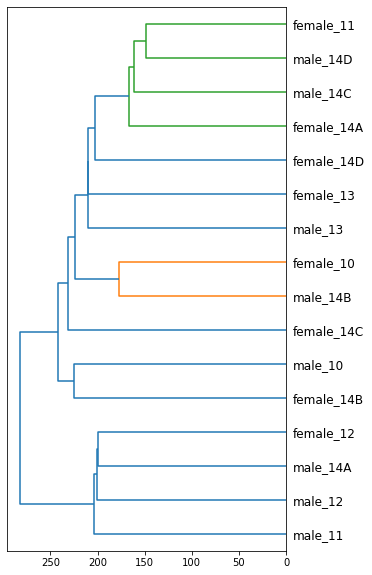

In [4]:
# order based on clustering
order_sample = leaves_list(linkage_matrix_sample)
order_gene = leaves_list(linkage_matrix_gene)
rna_order_gene = rna_seq_transform.reindex(order_gene)
col_list = list(rna_seq_transform.columns[3:])
col_order = list(rna_seq_transform.columns[:3])
for i in order_sample:
    col_order.append(col_list[i])
rna_order = rna_order_gene.reindex(col_order, axis = 1)
# plot dendrogram
plt.figure(figsize=(5, 10))
dendrogram(linkage_matrix_sample, orientation='left', labels=col_order[3:])
plt.show()

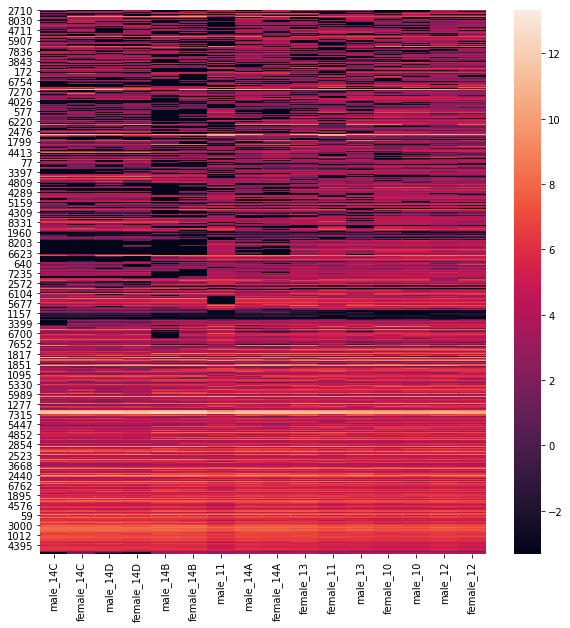

In [5]:
# plot heatmap of the gene expression data
plt.figure(figsize=(10, 10))
ax = sns.heatmap(rna_order.iloc[:, 3:])
plt.show()

In [6]:
# Set-up new dataframe with one column of gene_name, one column with FPKM, one column with stage number, one column with sex
# first split into male and female samples
male = rna_seq_transform.iloc[:,:11]
female = pd.concat([rna_seq_transform.iloc[:,:3],rna_seq_transform.iloc[:,11:]], axis = 1)
male_df = male.rename(columns={'male_10':'10','male_11':'11','male_12':'12','male_13':'13','male_14A':'14A','male_14B':'14B','male_14C':'14C','male_14D':'14D'})
female_df = female.rename(columns={'female_10':'10','female_11': '11','female_12':'12','female_13':'13','female_14A':'14A','female_14B':'14B','female_14C':'14C','female_14D':'14D'})
# add sex column
male_df['sex'] ='male'; female_df['sex'] ='female'
# combine male and female - so that stage columns align
intermediate = pd.concat([male_df,female_df], axis = 0)

# combine all stages into one column and add column with stage number
stages = ['10', '11', '12', '13', '14A', '14B', '14C', '14D']
# setup final dataframe format using the first three columns of the df and stage 10
gene_exp_df = pd.concat([intermediate.iloc[:,:4],intermediate['sex']], axis = 1)
# rename the stage to FPKM column
gene_exp_df = gene_exp_df.rename(columns={'10':'FPKM'})
# iterate through stages
for stage in stages:
    # add a stage column then skip over stage 10
    if stage == '10':
        gene_exp_df['stage'] = int(stage)
        continue
    # set up dataframe to be added next - first 3 columns + stage FPKM column + sex
    next_stage = pd.concat([intermediate.iloc[:,:3], intermediate[stage], intermediate['sex']], axis = 1)
    # rename stage name again to FPKM
    next_stage = next_stage.rename(columns={stage:'FPKM'})  
    # add the stage number column
    if stage in ['14A', '14B', '14C', '14D']: 
        # make all stage 14s the same
        next_stage['stage'] = 14
    else:
        next_stage['stage'] = int(stage)    
    # add new stage iteratively to the gene_exp_df
    gene_exp_df = pd.concat([gene_exp_df, next_stage], axis = 0)
gene_exp_df

,index,t_name,gene_name,FPKM,sex,stage
0,3,FBtr0302347,CR40182,4.573651,male,10
1,8,FBtr0113885,Parp,3.472120,male,10
2,9,FBtr0301810,Alg-2,4.260622,male,10
3,10,FBtr0113895,Tim17b,2.681610,male,10
4,11,FBtr0345179,Tim17b,6.899972,male,10
...,...,...,...,...,...,...
8608,34663,FBtr0100884,mt:Cyt-b,7.386673,female,14
8609,34665,FBtr0100886,mt:ND1,9.412730,female,14
8610,34667,FBtr0100888,mt:lrRNA,12.153787,female,14
8611,34684,FBtr0114261,CR41590,-2.713053,female,14


In [7]:
# set up ordinary least squares comparing stage (independent variable) to FPKM and store p-vals in dictionary
gene_pvals_df = pd.DataFrame(); pval_list = []
# iterate through all genes 
all_genes = list(gene_exp_df['gene_name'].unique())
for gene_name in all_genes:
    # pull out all rows for the gene_name
    gene_data = gene_exp_df[gene_exp_df['gene_name'] == gene_name]
    # for each gene - find least squares for all samples
    gene_model = smf.ols(formula = "stage ~ FPKM", data = gene_data)
    gene_fit = gene_model.fit()
    # save pvalue
    pval = gene_fit.pvalues
    pval_list.append(pval['FPKM'])
gene_pvals_df['gene_name'] = all_genes
gene_pvals_df['p-val'] = pval_list
gene_pvals_df['-log(p)'] = -np.log(pval_list)
gene_pvals_df

,gene_name,p-val,-log(p)
0,CR40182,0.735893,0.306671
1,Parp,0.162378,1.817829
2,Alg-2,0.263080,1.335297
3,Tim17b,0.018633,3.982842
4,CG41128,0.026845,3.617683
...,...,...,...
5551,mt:Cyt-b,0.049018,3.015564
5552,mt:ND1,0.051185,2.972317
5553,mt:lrRNA,0.546605,0.604029
5554,CR41590,0.170680,1.767968


In [8]:
# do the same but test ols with sex as a covariate
gene_P_sex_df = pd.DataFrame(); pval_list = []; beta_list = []
all_genes = list(gene_exp_df['gene_name'].unique())
for gene_name in all_genes:
    # pull out all rows for the gene_name
    gene_data = gene_exp_df[gene_exp_df['gene_name'] == gene_name]
    # for each gene - find least squares for all samples
    gene_model = smf.ols(formula = "stage ~ FPKM + sex", data = gene_data)
    gene_fit = gene_model.fit()
    #save pvalue and beta
    pval = gene_fit.pvalues
    beta = gene_fit.params
    pval_list.append(pval['FPKM'])
    beta_list.append(beta['FPKM'])
gene_P_sex_df['gene_name'] = all_genes
gene_P_sex_df['p-val'] = pval_list
gene_P_sex_df['-log(p)'] = -np.log(pval_list)
gene_P_sex_df['beta'] = beta_list
gene_P_sex_df

,gene_name,p-val,-log(p),beta
0,CR40182,0.745479,0.293729,0.316930
1,Parp,0.174987,1.743043,0.155257
2,Alg-2,0.274123,1.294177,0.234467
3,Tim17b,0.018813,3.973230,0.473462
4,CG41128,0.027936,3.577853,0.431017
...,...,...,...,...
5551,mt:Cyt-b,0.056993,2.864834,0.306331
5552,mt:ND1,0.057250,2.860334,0.266104
5553,mt:lrRNA,0.560402,0.579101,0.115444
5554,CR41590,0.177894,1.726569,-0.634967


Text(0.5, 1.0, 'QQ plot for the differential expression in stages\ncontrol for sex')

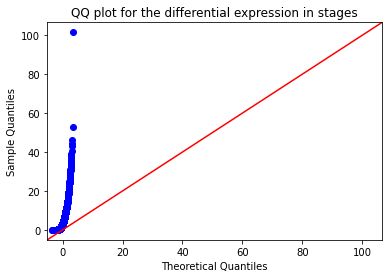

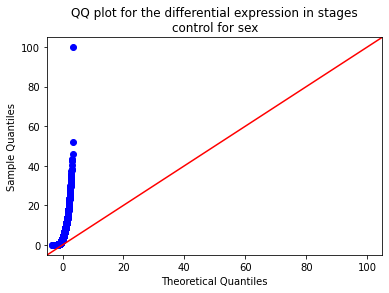

In [9]:
# make quantile-quantile plots for each regression analysis
ax1 = sm.qqplot(gene_pvals_df['-log(p)'], line = '45')
plt.title('QQ plot for the differential expression in stages')
ax2 = sm.qqplot(gene_P_sex_df['-log(p)'], line = '45')
plt.title('QQ plot for the differential expression in stages\ncontrol for sex')

In [10]:
# list of genes that exhibit differential expression by stage at a 10% false discovery rate
# sort based on pvalues (small to large)
pval_sort = gene_pvals_df.sort_values(by='p-val').reset_index()
n = len(gene_pvals_df.index)
# iterate over rows in sorted dataframe
for row in pval_sort.iterrows():
    index = row[0]; row_val = row[1]
    p_val = row_val['p-val']; 
    # false discovery - alpha = index/total number of tests * 10% false discovery rate
    alpha = (index*0.1)/n
    if p_val > alpha:         # if p-val is greater than alpha we've found the cut-off
        if index == 0:
            continue
        stop_index = index    # p-values below this cut-off are significant
        break        
diff_exp = pval_sort.iloc[:int(stop_index),:]      # store significant genes
insig_diff_exp = pval_sort.iloc[int(stop_index):, :]    # store insignificant genes
diff_exp.to_csv('/Users/cmdb/qbb2020-answers/week8-hw/sig_diff_exp.txt', sep='\t', index = False, columns = ['gene_name', 'p-val'])

In [11]:
# list of genes that exhibit differential expression by stage while controlling for sex at a 10% false discovery rate
pval_sort = gene_P_sex_df.sort_values(by='p-val').reset_index()
n = len(gene_P_sex_df.index)
for row in pval_sort.iterrows():
    index = row[0]; row_val = row[1]
    p_val = row_val['p-val']; 
    alpha = (index*0.1)/n
    if p_val > alpha:        # if p-val is greater than alpha we've found the cut-off
        if index == 0:
            continue
        stop_index = index   # p-values below this cut-off are significant
        break        
diff_exp_s = pval_sort.iloc[:int(stop_index),:]
insig_diff_exp_s = pval_sort.iloc[int(stop_index):, :]
diff_exp_s.to_csv('/Users/cmdb/qbb2020-answers/week8-hw/sig_diff_exp_w_sex.txt', sep='\t', index = False, columns = ['gene_name', 'p-val'])

In [12]:
# Percentage overlap: ((# overlapping genes) / (# genes in list without covariate)) * 100
diff_genes = list(diff_exp['gene_name'])         # list of genes without covariate
diff_genes_s = list(diff_exp_s['gene_name'])     # list of genes with covariate
overlap = 0                                      # initialize variable
for gene in diff_genes:                          # iterate through all genes without covariate
    if gene in diff_genes_s:                     # if gene is in with covariate list add one to overlap
        overlap +=1
percent_overlap = (overlap/len(diff_genes))*100  # percent overlap is ovelap/total genes without covariate
print('The percent overlap is', percent_overlap)

The percent overlap is 96.98581560283688


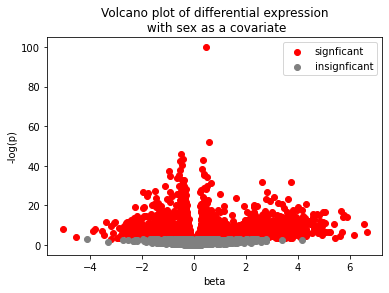

In [13]:
# Generate a volcano plot of the differential expression, with sex as a covariate, results 
# ( -log10(p-value) on the y-axis, beta on the x axis). Color the significant points in a different color.
fig, ax = plt.subplots()
# plot significant as red
ax.scatter(diff_exp_s['beta'], diff_exp_s['-log(p)'], color= 'r')
# plot insignficant as gray
ax.scatter(insig_diff_exp_s['beta'], insig_diff_exp_s['-log(p)'], color='grey')

ax.set_title('Volcano plot of differential expression\n with sex as a covariate')
ax.set_xlabel('beta')
ax.set_ylabel('-log(p)')
ax.legend(['signficant', 'insignficant'])